# 03 Hierarchical Clustering

In [ ]:
# Setup
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

### 2.3 Clustering Gerarchico

Il **clustering gerarchico** costruisce una gerarchia di cluster, rappresentabile tramite un **dendrogramma**. Esistono due approcci:

- **Agglomerativo** (bottom-up): ogni punto inizia come cluster singolo, poi si fondono
- **Divisivo** (top-down): tutti i punti iniziano in un cluster, poi si dividono

L'approccio agglomerativo e il piu comune e richiede una **strategia di linkage**:

| Linkage | Descrizione | Caratteristiche |
|---------|-------------|----------------|
| **Single** | Distanza minima tra punti | Sensibile al rumore, cluster allungati |
| **Complete** | Distanza massima tra punti | Cluster compatti |
| **Average** | Distanza media | Compromesso |
| **Ward** | Minimizza varianza intra-cluster | Cluster sferici, simile a K-Means |

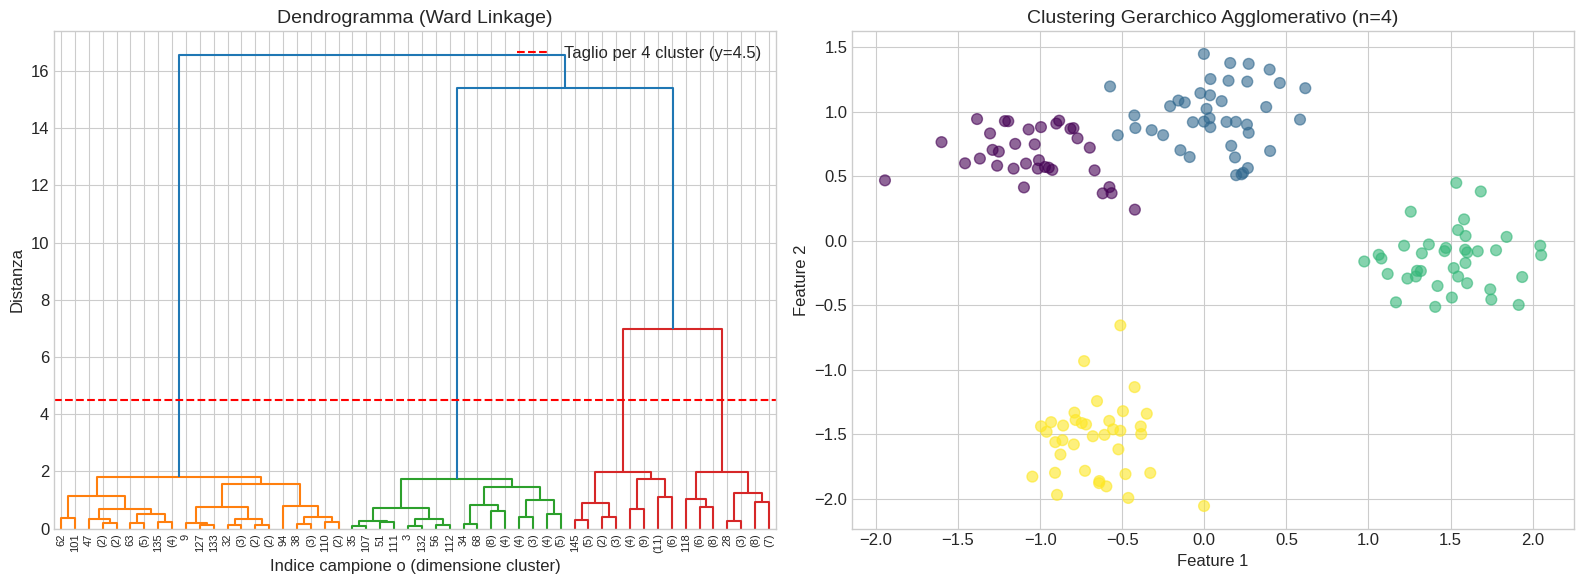

CONFRONTO STRATEGIE DI LINKAGE
Ward       Linkage - Silhouette: 0.681
Complete   Linkage - Silhouette: 0.655
Average    Linkage - Silhouette: 0.680
Single     Linkage - Silhouette: 0.568


In [6]:
# SEZIONE 2.3: Clustering Gerarchico
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Generazione dati con cluster piu vicini
# per evidenziare le differenze tra strategie
X_hier, _ = make_blobs(
    n_samples=150, n_features=2,
    centers=4, cluster_std=1.5,
    random_state=42
)
scaler_hier = StandardScaler()
X_hier_scaled = scaler_hier.fit_transform(X_hier)

# Dendrogramma
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calcolo linkage per dendrogramma
Z = linkage(X_hier_scaled, method='ward')

# Plot dendrogramma
dendrogram(
    Z, ax=axes[0], truncate_mode='level', p=5,
    leaf_rotation=90, leaf_font_size=8
)
axes[0].set_title(
    'Dendrogramma (Ward Linkage)', fontsize=14
)
axes[0].set_xlabel(
    'Indice campione o (dimensione cluster)'
)
axes[0].set_ylabel('Distanza')
# Calcolo soglia programmatica per 4 cluster dal linkage matrix
# Con n_clusters=4 servono i top 3 merge; la soglia e la media
# tra la 3a e 4a distanza di merge piu alta
n_target_clusters = 4
sorted_distances = Z[:, 2]  # colonna 2 = distanze di merge
# soglia = punto medio tra il merge che porta a 4 cluster e quello che porta a 3
cut_idx = len(sorted_distances) - (n_target_clusters - 1)
threshold = (sorted_distances[cut_idx - 1] + sorted_distances[cut_idx]) / 2
axes[0].axhline(
    y=threshold, color='red', linestyle='--',
    label=f'Taglio per {n_target_clusters} cluster (y={threshold:.1f})'
)
axes[0].legend()

# Clustering agglomerativo
agg_clustering = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)
labels_hier = agg_clustering.fit_predict(X_hier_scaled)

# Visualizzazione cluster
scatter = axes[1].scatter(
    X_hier_scaled[:, 0], X_hier_scaled[:, 1],
    c=labels_hier, cmap='viridis', alpha=0.6, s=60
)
axes[1].set_title(
    'Clustering Gerarchico Agglomerativo (n=4)',
    fontsize=14
)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Confronto linkage strategies
print("=" * 50)
print("CONFRONTO STRATEGIE DI LINKAGE")
print("=" * 50)

for linkage_type in [
    'ward', 'complete', 'average', 'single'
]:
    agg = AgglomerativeClustering(
        n_clusters=4, linkage=linkage_type
    )
    labels = agg.fit_predict(X_hier_scaled)
    score = silhouette_score(X_hier_scaled, labels)
    print(
        f"{linkage_type.capitalize():10} Linkage"
        f" - Silhouette: {score:.3f}"
    )

**Osservazioni importanti sul Clustering Gerarchico**

- Il dendrogramma permette di visualizzare la struttura gerarchica e scegliere il numero di cluster
- Ward linkage tende a creare cluster di dimensioni simili
- Complessita $O(n^2)$ in memoria e $O(n^3)$ in tempo: non adatto a grandi dataset

**Quando usare il Clustering Gerarchico**

- Dataset di dimensioni moderate (< 10.000 punti)
- Quando si vuole visualizzare la struttura gerarchica
- Per analisi esplorative
- Quando non si conosce il numero ottimale di cluster